<a href="https://colab.research.google.com/github/AlejandroRojas602/Scripts/blob/master/AjustePolinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np

def polyfit2(x,y,n):

    def inv(A):
      return np.linalg.inv(A) #Matriz inversa de la matriz a
    def trans(A):
      return A.getT() #Transpuesta de la matriz A
    def prod(A,B):
      return np.dot(A,B)  #Producto punto entre los vectores A y B

    xlen = len(x) #Calcula la longitud del vector x
    ylen =len(y)
    one = np.ones((xlen,n+1),dtype=int) #Matriz de unos de dimensiones (xlen,n+1)
    c1=one[:,[1]] #Seleccionamos sólo la columna 1 de la matriz one
    xT=np.matrix(x) #Convierte los datos a una matriz de numpy
    yT=np.matrix(y) #Convierte los datos a una matriz de numpy
    c2=xT.getT()
    c3=np.power(c2,2) #Eleva al cuadrado los elementos de la matriz c2
    A=np.hstack([c1,c2,c3]) #Agrupa las columnas c1, c2, c3 en una matriz A
    ajuste = prod(prod(inv(prod(trans(A),A)),trans(A)),trans(yT))
    print(ajuste)

x=[1.0,-2.0,3.0,4.0]
y=[4.0,5.0,-1.0,1.0]

polyfit2(x,y,2)

[[ 3.75      ]
 [-0.81060606]
 [-0.03787879]]


In [0]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
import matplotlib.pyplot as plt 
import pandas as pd 

In [25]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


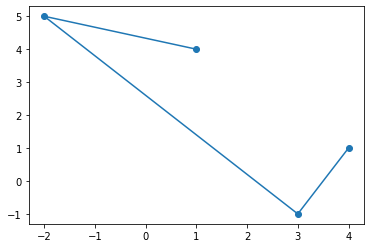

In [35]:
dataset = pd.read_csv("Salary_Data.csv")
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values 

lin_reg = LinearRegression()
poly_reg = PolynomialFeatures(degree=3)

X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly,y)
lin_reg.fit(X_poly,y)

plt.scatter(X,y)
plt.plot(X,lin_reg.predict(poly_reg.fit_transform(X)))
plt.show()